In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# STEP 1

In [19]:
train=pd.read_csv("C:\\Users\\User\\Desktop\\koleya\\level2 term2\\neural networks\\project\\project 1\mnist_train.csv")
test= pd.read_csv("C:\\Users\\User\\Desktop\\koleya\\level2 term2\\neural networks\\project\\project 1\\mnist_test.csv")
data=pd.concat([train, test], axis=0)
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Split the data into features (X) and labels (y)
X = data.iloc[:, 1:].values 
y = data.iloc[:, 0].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X ,y , test_size=0.2)

# STEP 2

In [21]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        torch.manual_seed(42)
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
class dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X).float()
        self.y = torch.tensor(y).long()
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [13]:
X_train.index=range(len(X_train))
X_val.index=range(len(X_val))
y_train.index=range(len(y_train))
y_val.index=range(len(y_val))

In [23]:
# Create data loaders for the training and validation sets
train_dataset = dataset(X_train, y_train)
val_dataset = dataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=64)
val_loader = DataLoader(val_dataset, batch_size=64)

In [24]:
def train_valid_plot(model,criterion,optimizer,num_epochs):
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []
    # Train your model with a batch size of 64 and 10 epochs
    for epoch in range(num_epochs):
        running_train_loss = 0.0
        running_train_correct = 0
        running_val_loss = 0.0
        running_val_correct = 0
        texamples=0
        vexamples=0
        
        # Training loop
        model.train()
        for i, data in enumerate(train_loader):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            running_train_correct += (predicted == labels).sum().item()
            texamples += (predicted == labels).shape[0]
            
        # Validation loop
        model.eval()

        #It is used when we don’t need to calculate gradients during the forward pass. This reduces memory usage and speeds up computation 
        with torch.no_grad():

            for i, data in enumerate(val_loader):
                inputs, labels = data

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                running_val_correct += (predicted == labels).sum().item()
                vexamples += (predicted == labels).shape[0]
            
        
        # Calculate and print the training and validation loss and accuracy
        train_loss = running_train_loss / len(train_loader) # batch size
        train_acc = running_train_correct / texamples # all dataset length
        val_loss = running_val_loss / len(val_loader)
        val_acc = running_val_correct / vexamples

        print(f"Epoch {epoch+1}: Training Loss: {train_loss:.5f}, Training Accuracy: {train_acc:.5f}, Validation Loss: {val_loss:.5f}, Validation Accuracy: {val_acc:.5f}")
        
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        valid_losses.append(val_loss)
        valid_accs.append(val_acc)


    plt.plot(train_losses, label='Train')
    plt.plot(valid_losses, label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

        # Plot the training and validation accuracy
    plt.plot(train_accs, label='Train')
    plt.plot(valid_accs, label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Epoch 1: Training Loss: 0.98306, Training Accuracy: 0.85900, Validation Loss: 0.32849, Validation Accuracy: 0.91071
Epoch 2: Training Loss: 0.35706, Training Accuracy: 0.90986, Validation Loss: 0.33085, Validation Accuracy: 0.92314
Epoch 3: Training Loss: 0.38410, Training Accuracy: 0.90500, Validation Loss: 0.36210, Validation Accuracy: 0.91171
Epoch 4: Training Loss: 0.38868, Training Accuracy: 0.90596, Validation Loss: 0.41505, Validation Accuracy: 0.89836
Epoch 5: Training Loss: 0.42572, Training Accuracy: 0.89998, Validation Loss: 0.41887, Validation Accuracy: 0.91100
Epoch 6: Training Loss: 0.51790, Training Accuracy: 0.87948, Validation Loss: 0.59142, Validation Accuracy: 0.87100
Epoch 7: Training Loss: 0.57758, Training Accuracy: 0.87213, Validation Loss: 0.52852, Validation Accuracy: 0.88750
Epoch 8: Training Loss: 0.54882, Training Accuracy: 0.87714, Validation Loss: 0.99550, Validation Accuracy: 0.73607
Epoch 9: Training Loss: 0.60090, Training Accuracy: 0.84886, Validation 

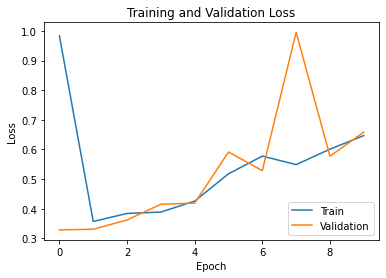

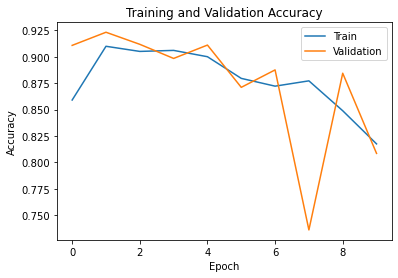

In [25]:
# Create the neural network
#np.random.seed(0)
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 10
train_valid_plot(model,criterion,optimizer,num_epochs)

# STEP 3

In [28]:
# Define the neural network architecture
class Net_2(nn.Module):
    def __init__(self,do):
        super(Net_2, self).__init__()
        torch.manual_seed(42)
        self.fc1 = nn.Linear(784, 128)
        self.bn1 = nn.LayerNorm(128)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=do)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.LayerNorm(64)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=do)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.drop1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.drop2(x)
        x = self.fc3(x)
        return x

Epoch 1: Training Loss: 0.55526, Training Accuracy: 0.83473, Validation Loss: 0.19452, Validation Accuracy: 0.93986
Epoch 2: Training Loss: 0.35003, Training Accuracy: 0.90380, Validation Loss: 0.17330, Validation Accuracy: 0.94821
Epoch 3: Training Loss: 0.30235, Training Accuracy: 0.91677, Validation Loss: 0.14143, Validation Accuracy: 0.95643
Epoch 4: Training Loss: 0.27415, Training Accuracy: 0.92388, Validation Loss: 0.13181, Validation Accuracy: 0.96021
Epoch 5: Training Loss: 0.25439, Training Accuracy: 0.93055, Validation Loss: 0.13067, Validation Accuracy: 0.96179
Epoch 6: Training Loss: 0.24501, Training Accuracy: 0.93293, Validation Loss: 0.12360, Validation Accuracy: 0.96221
Epoch 7: Training Loss: 0.23397, Training Accuracy: 0.93511, Validation Loss: 0.11816, Validation Accuracy: 0.96543
Epoch 8: Training Loss: 0.22247, Training Accuracy: 0.93837, Validation Loss: 0.10499, Validation Accuracy: 0.96921
Epoch 9: Training Loss: 0.21429, Training Accuracy: 0.94059, Validation 

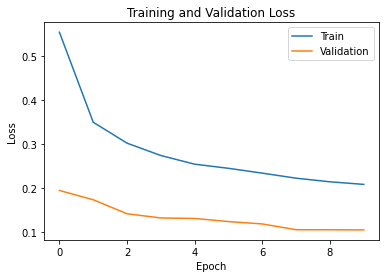

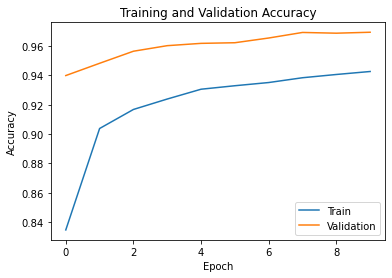

In [29]:
#np.random.seed(0)
do=0.5
model = Net_2(do)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# Train the neural network
num_epochs = 10
train_valid_plot(model,criterion,optimizer,num_epochs)

# STEP 4

Epoch 1: Training Loss: 0.36612, Training Accuracy: 0.90504, Validation Loss: 0.12770, Validation Accuracy: 0.96071
Epoch 2: Training Loss: 0.16956, Training Accuracy: 0.94902, Validation Loss: 0.09947, Validation Accuracy: 0.96914
Epoch 3: Training Loss: 0.13437, Training Accuracy: 0.95870, Validation Loss: 0.08497, Validation Accuracy: 0.97257
Epoch 4: Training Loss: 0.11226, Training Accuracy: 0.96523, Validation Loss: 0.07950, Validation Accuracy: 0.97543
Epoch 5: Training Loss: 0.10042, Training Accuracy: 0.96832, Validation Loss: 0.07713, Validation Accuracy: 0.97593
Epoch 6: Training Loss: 0.09023, Training Accuracy: 0.97196, Validation Loss: 0.07794, Validation Accuracy: 0.97607
Epoch 7: Training Loss: 0.08161, Training Accuracy: 0.97368, Validation Loss: 0.07323, Validation Accuracy: 0.97814
Epoch 8: Training Loss: 0.07522, Training Accuracy: 0.97559, Validation Loss: 0.07007, Validation Accuracy: 0.97829
Epoch 9: Training Loss: 0.07089, Training Accuracy: 0.97654, Validation 

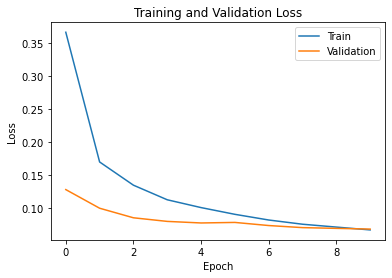

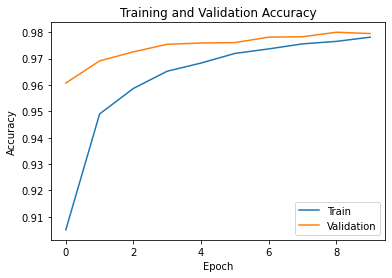

In [11]:
# Define the neural network architecture
#np.random.seed(0)
# Create the neural network
do=0.2
net = Net_2(do)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
train_valid_plot(net,criterion,optimizer,num_epochs)

Epoch 1: Training Loss: 0.63436, Training Accuracy: 0.83943, Validation Loss: 0.20949, Validation Accuracy: 0.93886
Epoch 2: Training Loss: 0.31641, Training Accuracy: 0.90879, Validation Loss: 0.15480, Validation Accuracy: 0.95150
Epoch 3: Training Loss: 0.26521, Training Accuracy: 0.92275, Validation Loss: 0.12541, Validation Accuracy: 0.96150
Epoch 4: Training Loss: 0.22655, Training Accuracy: 0.93207, Validation Loss: 0.11247, Validation Accuracy: 0.96507
Epoch 5: Training Loss: 0.20821, Training Accuracy: 0.93821, Validation Loss: 0.10373, Validation Accuracy: 0.96650
Epoch 6: Training Loss: 0.19269, Training Accuracy: 0.94268, Validation Loss: 0.09570, Validation Accuracy: 0.96993
Epoch 7: Training Loss: 0.17988, Training Accuracy: 0.94709, Validation Loss: 0.09363, Validation Accuracy: 0.97114
Epoch 8: Training Loss: 0.17207, Training Accuracy: 0.94855, Validation Loss: 0.08975, Validation Accuracy: 0.97193
Epoch 9: Training Loss: 0.16421, Training Accuracy: 0.95089, Validation 

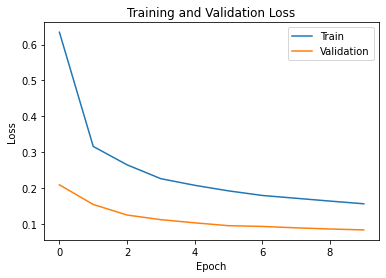

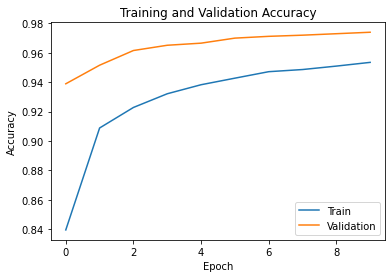

In [12]:
# Define the neural network architecture
#np.random.seed(0)
# Create the neural network
net = Net_2(0.4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)
train_valid_plot(net,criterion,optimizer,num_epochs)

Epoch 1: Training Loss: 1.56552, Training Accuracy: 0.52523, Validation Loss: 0.87753, Validation Accuracy: 0.87179
Epoch 2: Training Loss: 0.94195, Training Accuracy: 0.76111, Validation Loss: 0.49491, Validation Accuracy: 0.90293
Epoch 3: Training Loss: 0.72611, Training Accuracy: 0.80702, Validation Loss: 0.36064, Validation Accuracy: 0.91214
Epoch 4: Training Loss: 0.62571, Training Accuracy: 0.83077, Validation Loss: 0.30684, Validation Accuracy: 0.91900
Epoch 5: Training Loss: 0.56713, Training Accuracy: 0.84155, Validation Loss: 0.26743, Validation Accuracy: 0.92714
Epoch 6: Training Loss: 0.52753, Training Accuracy: 0.85213, Validation Loss: 0.24577, Validation Accuracy: 0.93036
Epoch 7: Training Loss: 0.49496, Training Accuracy: 0.86002, Validation Loss: 0.22991, Validation Accuracy: 0.93386
Epoch 8: Training Loss: 0.47708, Training Accuracy: 0.86318, Validation Loss: 0.21812, Validation Accuracy: 0.93479
Epoch 9: Training Loss: 0.45767, Training Accuracy: 0.86939, Validation 

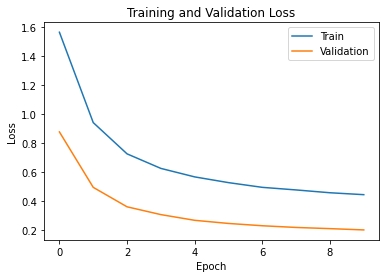

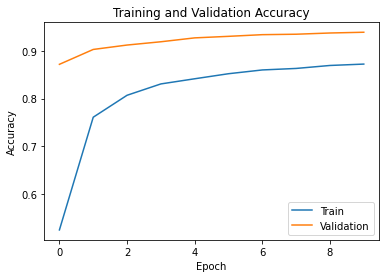

In [13]:
# Define the neural network architecture
#np.random.seed(0)
# Create the neural network
do=0.6
net = Net_2(do)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)
train_valid_plot(net,criterion,optimizer,num_epochs)